# The SARS-CoV-2 (Covid-19) epidemic analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path
from os import path

The data on the Covid-19 incidence are available [here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv). We download them as a file in CSV format.

In [2]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"



Data downloaded on 09.06.2020

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `Province/State`       | Province/State                                                              |
| `Country/Region`  | Country/Region                               |
| `Lat`        | Latitude                                                      |
| `Long`    | Longitude                                                            |
| `1/22/20`     | Dates                                                            |

In [3]:
exists = os.path.isfile('statistics.csv')
if exists:
    raw_data = pd.read_csv('statistics.csv')
    df = pd.DataFrame(raw_data)
else:
    raw_data = pd.read_csv(data_url)
    df = pd.DataFrame(raw_data)
    df.to_csv('statistics.csv')
    
raw_data

Unnamed: 0                    Province/State          Country/Region  \
0             0                               NaN             Afghanistan   
1             1                               NaN                 Albania   
2             2                               NaN                 Algeria   
3             3                               NaN                 Andorra   
4             4                               NaN                  Angola   
5             5                               NaN     Antigua and Barbuda   
6             6                               NaN               Argentina   
7             7                               NaN                 Armenia   
8             8      Australian Capital Territory               Australia   
9             9                   New South Wales               Australia   
10           10                Northern Territory               Australia   
11           11                        Queensland               Australia   
12           12                   South Australia               Australia   
13           13                          Tasmania               Australia   
14           14                          Victoria               Australia   
15           15                 Western Australia               Australia   
16           16                               NaN                 Austria   
17           17                               NaN              Azerbaijan   
18           18                               NaN                 Bahamas   
19           19                               NaN                 Bahrain   
20           20                               NaN              Bangladesh   
21           21                               NaN                Barbados   
22           22                               NaN                 Belarus   
23           23                               NaN                 Belgium   
24           24                               NaN                   Benin   
25           25                               NaN                  Bhutan   
26           26                               NaN                 Bolivia   
27           27                               NaN  Bosnia and Herzegovina   
28           28                               NaN                  Brazil   
29           29                               NaN                  Brunei   
..          ...                               ...                     ...   
236         236                               NaN             Timor-Leste   
237         237                               NaN                  Belize   
238         238                               NaN                    Laos   
239         239                               NaN                   Libya   
240         240                               NaN      West Bank and Gaza   
241         241                               NaN           Guinea-Bissau   
242         242                               NaN                    Mali   
243         243                               NaN   Saint Kitts and Nevis   
244         244             Northwest Territories                  Canada   
245         245                             Yukon                  Canada   
246         246                               NaN                  Kosovo   
247         247                               NaN                   Burma   
248         248                          Anguilla          United Kingdom   
249         249            British Virgin Islands          United Kingdom   
250         250          Turks and Caicos Islands          United Kingdom   
251         251                               NaN              MS Zaandam   
252         252                               NaN                Botswana   
253         253                               NaN                 Burundi   
254         254                               NaN            Sierra Leone   
255         255  Bonaire, Sint Eustatius and Saba             Netherlands   
2

Remove Long and Lat columns (just for convenience) and make a spared copy in df_total for the "world" graph

In [4]:
df_total=df.drop(columns=['Lat', 'Long'])
df=df_total

Remove "not interesting" countries

In [5]:
df=df.drop(df[(df['Country/Region'] != 'Belgium') & (df['Country/Region'] != 'China') & (df['Country/Region'] != 'France') & (df['Country/Region'] != 'Germany') & (df['Country/Region'] != 'Iran') & (df['Country/Region'] != 'Italy') & (df['Country/Region'] != 'Japan') & (df['Country/Region'] != 'Korea South') & (df['Country/Region'] != 'Netherlands') & (df['Country/Region'] != 'Portugal') & (df['Country/Region'] != 'Spain') & (df['Country/Region'] != 'United Kingdom') & (df['Country/Region'] != 'US')].index)


For convenience change China to Hong Kong in the Hong Kong line

In [6]:
df=df.set_value(df[(df['Province/State'] == 'Hong Kong')].index, 'Country/Region', 'Hong Kong')


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


Remove colonies of France, Netherlands and UK

In [7]:
fr=df[(df['Country/Region']=='France')]
fr=fr['Province/State']
fr=fr.dropna()

ne=df[(df['Country/Region']=='Netherlands')]
ne=ne['Province/State']
ne=ne.dropna()

uk=df[(df['Country/Region']=='United Kingdom')]
uk=uk['Province/State']
uk=uk.dropna()

df=df.drop(fr.index)
df=df.drop(ne.index)
df=df.drop(uk.index)


Remove Province/State column and compute total daily sum for China

In [8]:
df.drop('Province/State', axis = 1, inplace = True)
grouped=df.groupby('Country/Region')
df=grouped.sum()

Construct graphs for the countries above

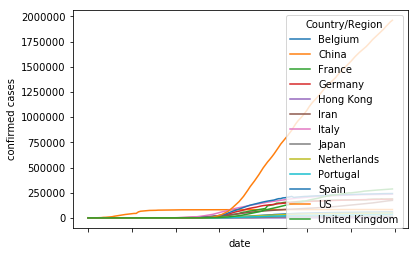

In [9]:
ax=df.transpose().plot()
ax.set_xlabel("date")
ax.set_ylabel("confirmed cases")
plt.show()

Next we make the analogous graph for the Covid-19 incidence in the world

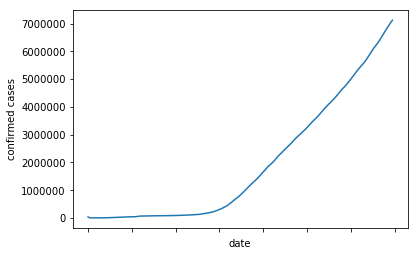

In [10]:
df=df_total
df.drop('Province/State', axis = 1, inplace = True)
df.drop('Country/Region', axis = 1, inplace = True)
df=df.sum(axis=0)

ax=df.transpose().plot()
ax.set_xlabel("date")
ax.set_ylabel("confirmed cases")
plt.show()